# Visualization of the Graphene Cell

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from graphenetools import gt
import re,glob,os,sys
from scipy.signal import argrelextrema
import dgutils.colors as colortools
from collections import defaultdict
import importlib
from PIL import Image,ImageOps

from vapory import *
π = np.pi

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# plot style
plot_style = {'notebook':'../include/notebook.mplstyle','aps':'../include/aps.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['aps'])
figsize = plt.rcParams['figure.figsize']

included = ["colors.inc","textures.inc","functions.inc"]
filename = "../plots/graphene_cell.pov"

## Setting the colors

In [2]:
blue = colortools.hex_to_rgb('#0073CD')
grey = colortools.hex_to_rgb('#a7a7a7')
brown = colortools.hex_to_rgb('#e9b68c')
brown = colortools.hex_to_rgb('#926f34')
green = colortools.hex_to_rgb('#15A05E')

## Construct the graphene lattice, $\sqrt{3}\times\sqrt{3}$ adsorbant and bonds

In [3]:
# lattice vectors
aₒ = 1.42
a = (aₒ/2)*np.array([[np.sqrt(3),-np.sqrt(3)],[3,3]])

#√3 x √3
θ = π/6
R = np.array([[np.cos(θ),-np.sin(θ)],[np.sin(θ),np.cos(θ)]])
α = np.matmul(R,np.sqrt(3)*a)

# basis vectors
b = aₒ*np.array([[np.sqrt(3)/2,0],[1/2,1]])

# Box size
L = [8,8]

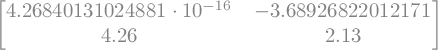

In [4]:
import sympy
sympy.init_printing(use_unicode=True)
sympy.Matrix(α)

### The Lattice

In [6]:
C_positions = []
G_centers = []
hex_centers = []
for n1 in range(-8,8):
    for n2 in range(-8,8):
        G_centers.append(n1*α[:,0] + n2*α[:,1])
        C_positions.append(n1*a[:,0] + n2*a[:,1] + b[:,0])
        C_positions.append(n1*a[:,0] + n2*a[:,1] + b[:,1])
        hex_centers.append(n1*a[:,0] + n2*a[:,1])

C_positions = np.array(C_positions)
G_centers = np.array(G_centers)
hex_centers = np.array(hex_centers)

C_positions = np.array(C_positions[np.intersect1d(np.where(np.abs(C_positions[:,0])<L[0])[0],np.where(np.abs(C_positions[:,1])<L[1])[0])])
He_positions = np.array(G_centers[np.intersect1d(np.where(np.abs(G_centers[:,0])<L[0])[0],np.where(np.abs(G_centers[:,1])<L[1])[0])])
hex_centers = np.array(hex_centers[np.intersect1d(np.where(np.abs(hex_centers[:,0])<L[0])[0],np.where(np.abs(hex_centers[:,1])<L[1])[0])])

Text(0, 0.5, 'y  /  Å')

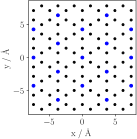

In [7]:
fig,ax = plt.subplots()
ax.scatter(C_positions[:,0],C_positions[:,1], s=4, color='k')
ax.scatter(He_positions[:,0],He_positions[:,1], s=8, color='b')

ax.set_aspect('equal')
ax.set_xlabel('x  /  Å')
ax.set_ylabel('y  /  Å')

### Visualizing the Lattice Vectors

Text(0, 0.5, 'y  /  Å')

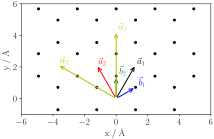

In [8]:
fig,ax = plt.subplots()
#ax.scatter(He_positions[:,0],He_positions[:,1], s=8, color='b')

ax.annotate("",
            xy=(a[0,0], a[1,0]), xycoords='data',
            xytext=(0, 0), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",ec='k'),
            )
ax.annotate(r"$\vec{a}_1$",
            xy=(a[0,0], a[1,0]), xycoords='data',
            xytext=(1, 1), textcoords='offset points',
            )

ax.annotate("",
            xy=(a[0,1], a[1,1]), xycoords='data',
            xytext=(0, 0), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",ec='r'),
            )
ax.annotate(r"$\vec{a}_2$",
            xy=(a[0,1], a[1,1]), xycoords='data',
            xytext=(1, 1), textcoords='offset points', color='r'
            )

ax.annotate("",
            xy=(b[0,0], b[1,0]), xycoords='data',
            xytext=(0, 0), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",ec='b'),
            )

ax.annotate(r"$\vec{b}_1$",
            xy=(b[0,0], b[1,0]), xycoords='data',
            xytext=(2, 2), textcoords='offset points', color='b'
            )

ax.annotate("",
            xy=(b[0,1], b[1,1]), xycoords='data',
            xytext=(0, 0), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",ec='g'),
            )
ax.annotate(r"$\vec{b}_2$",
            xy=(b[0,1], b[1,1]), xycoords='data',
            xytext=(2, 2), textcoords='offset points', color='g'
            )

ax.annotate("",
            xy=(α[0,0], α[1,0]), xycoords='data',
            xytext=(0, 0), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",ec='y'),
            )
ax.annotate(r"$\vec{\alpha}_1$",
            xy=(α[0,0], α[1,0]), xycoords='data',
            xytext=(2, 2), textcoords='offset points', color='y'
            )

ax.annotate("",
            xy=(α[0,1], α[1,1]), xycoords='data',
            xytext=(0, 0), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",ec='y',zorder=-10),
            )
ax.annotate(r"$\vec{\alpha}_2$",
            xy=(α[0,1], α[1,1]), xycoords='data',
            xytext=(2, 2), textcoords='offset points', color='y',zorder=-10
            )

ax.scatter(C_positions[:,0],C_positions[:,1], s=4, color='k')


ax.set_aspect('equal')
ax.set_xlim(-6,6)
ax.set_ylim(-1,6)
ax.set_xlabel('x  /  Å')
ax.set_ylabel('y  /  Å')

### The Bonds

Text(0, 0.5, 'y  /  Å')

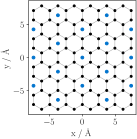

In [9]:
bonds = np.empty([0,4])
fig,ax = plt.subplots()

NG = len(C_positions)
for i in range(NG):
    ri = C_positions[i]
    for j in range(i,NG):
        rj = C_positions[j]
        d = np.linalg.norm(ri-rj)
        if d > 0.1 and d < (aₒ+0.1):
            ax.plot([ri[0],rj[0]],[ri[1],rj[1]],'-', zorder=-1, lw=0.5,color=grey)
            bonds = np.vstack((bonds,[ri[0],rj[0],ri[1],rj[1]]))
            
ax.scatter(C_positions[:,0],C_positions[:,1], s=4, color='k')
ax.scatter(He_positions[:,0],He_positions[:,1], s=8, color=blue)
ax.set_aspect('equal')
ax.set_xlabel('x  /  Å')
ax.set_ylabel('y  /  Å')

In [10]:
x,y = C_positions[:,0],C_positions[:,1]
x1,x2,y1,y2 = bonds[:,0],bonds[:,1],bonds[:,2],bonds[:,3]

## Create a graphic of the dual triangular lattice

In [11]:
dual_bonds = np.empty([0,4])

NA = len(hex_centers)
for i in range(NA):
    ri = hex_centers[i]
    for j in range(i,NA):
        rj = hex_centers[j]
        d = np.linalg.norm(ri-rj)
        if d > 0.1 and d < (np.sqrt(3)*aₒ+0.1):
            dual_bonds = np.vstack((dual_bonds,[ri[0],rj[0],ri[1],rj[1]]))

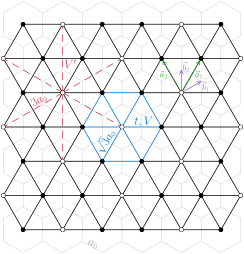

In [11]:
fig,ax = plt.subplots(figsize=(3.6, 3.6), constrained_layout=True)
decorate = True

for i in range(len(x1)):
    ax.plot([x1[i],x2[i]],[y1[i],y2[i]],'-', zorder=-100, lw=0.25,color=grey)

for bond in dual_bonds:
    if decorate and -2*aₒ < bond[0] < 2*aₒ and -2*aₒ < bond[1] < 2*aₒ and -2*aₒ < bond[2] < 2*aₒ and -2*aₒ < bond[3] < 2*aₒ:
        bond_color = '#0173cd'
    else:
        bond_color = 'k'
        
    ax.plot([bond[0],bond[1]],[bond[2],bond[3]],'-', zorder=-1, lw=0.75,color=bond_color)

ax.scatter(hex_centers[:,0],hex_centers[:,1], s=14, color='k')


if decorate:
    ax.annotate(r'$t,V$', xy=(aₒ-0.15,0), xytext=(aₒ-0.15,0), ha='center', va='bottom',
            fontsize=12, color='#0173cd')
    
    ax.scatter(He_positions[:,0],He_positions[:,1], s=8, facecolor='w')

    r0 = α[0,1], α[1,1] 
    nn_bonds = [[r0[0],r0[0]+α[0,1],r0[1],r0[1]+α[1,1]],
                [r0[0],r0[0],r0[1],r0[1]+α[1,0]],
                [r0[0],r0[0]-α[0,1],r0[1],r0[1]+α[1,1]],
                [r0[0],r0[0]-α[0,1],r0[1],r0[1]-α[1,1]],
                [r0[0],r0[0],r0[1],r0[1]-α[1,0]],
                [r0[0],r0[0]+α[0,1],r0[1],r0[1]-α[1,1]]
               ]
    for cnn in nn_bonds:
        ax.plot([cnn[0],cnn[1]],[cnn[2],cnn[3]], ls='--', color='#d43e4e', lw=0.75, 
           zorder=-10,dashes=(10, 7))

    ax.annotate(r'$V^\prime$', xy=(α[0,1]+0.1,α[1,0]-0.1), xytext=(α[0,1]+0.1,α[1,0]-0.1), ha='left', va='top',
                fontsize=12, color='#d43e4e')

    ax.annotate(r'$3a_0$', xy=(-5.75,2.2), xytext=(-5.75,2.2), ha='left', va='top',
                fontsize=12, color='#d43e4e', rotation=30)

    ax.annotate(r'$\sqrt{3}a_0$', xy=(-1.75,-0.0), xytext=(-1.75,-0.0), ha='left', va='top',
                fontsize=12, color='#0173cd', rotation=60)

    ax.annotate(r'$a_0$', xy=(-2.2,-6.8), xytext=(-2.2,-6.8), ha='left', va='top',
                fontsize=12, color=grey, rotation=-20)

    # Lattice Vectors
    ax.annotate("",zorder=-1,
                xy=(-α[0,1]+a[0,0], α[1,1]+a[1,0]), xycoords='data',
                xytext=(-α[0,1], α[1,1]), textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3",ec=colors[2], lw=0.75),
                )

    ax.annotate(r"$\vec{a}_1$",
                xy=(4.5,3.1), xycoords='data',
                xytext=(4.5,3.1),color=colors[2])

    ax.annotate("",zorder=-1,
                xy=(-α[0,1]+a[0,1], α[1,1]+a[1,1]), xycoords='data',
                xytext=(-α[0,1], α[1,1]), textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3",ec=colors[2], lw=0.75),
                )

    ax.annotate(r"$\vec{a}_2$",
                xy=(2.3,3.1), xycoords='data',
                xytext=(2.3,3.1),color=colors[2])

    # Basis Vectors
    ax.annotate("",zorder=-1,
                xy=(-α[0,1]+b[0,0]+0.12, α[1,1]+b[1,0]+0.067), xycoords='data',
                xytext=(-α[0,1], α[1,1]), textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3",ec=colors[4], lw=0.75),
                )

    ax.annotate(r"$\vec{b}_1$",zorder=-1,
                xy=(-α[0,1]+b[0,0]+0.12, α[1,1]+b[1,0]+0.067), xycoords='data',
                xytext=(-2, -10), textcoords='offset points',color=colors[4],
                )

    ax.annotate("",zorder=-1,
                xy=(-α[0,1]+b[0,1], α[1,1]+b[1,1]+0.14), xycoords='data',
                xytext=(-α[0,1], α[1,1]), textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3",ec=colors[4], fc=colors[4], lw=0.75),
                )

    ax.annotate(r"$\vec{b}_2$",zorder=-1,
                xy=(-α[0,1]+b[0,1], α[1,1]+b[1,1]+0.14), xycoords='data',
                xytext=(0, -3), textcoords='offset points',color=colors[4],
            )


ax.set_xlim(-7.54,7.54)
ax.set_ylim(-7.85,7.85)
ax.set_aspect('equal')
ax.axis('off')

plt.savefig('../plots/triangular.pdf')
plt.savefig('../plots/triangular.svg')

## A Graphene Adsorption Cell
### Setting the colors and sizes for some objects

In [51]:
col_C = Texture(Finish('ambient','0.2','diffuse','0.8'),Pigment('color',brown,'transmit',0.0))
col_bond = Texture(Finish('phong','0.2'),Pigment('color',brown,'transmit',0.0))
col_He = Texture(Finish('phong','0.9','phong_size',400),Pigment('color',blue,'transmit',0.0))

col_box = Texture(Finish('specular',0.5,'roughness',0.001,
                        'ambient',0,'diffuse',0.6,'conserve_energy'),
                    Pigment('color','Gray','transmit',0.0))

col_int = Texture(Finish('specular',0.5,'roughness',0.001,
                        'ambient',0,'diffuse',0.6,'conserve_energy'),
                    Pigment('color','Gray','transmit',0.5))

col_floor = Texture(Pigment('color','White','transmit',0.0))


r_C = 0.30 # radius of C-atoms in graphene
r_He = 1.2*r_C #/2.258# radius of He-atoms 

### Generate the graphene lattice

In [13]:
sphere = [Sphere([x[i],0, y[i]], r_C, col_C) for i in range(len(x))]
cylinder = [Cylinder([x1[i],0.0,y1[i]],[x2[i],0.0,y2[i]], 0.075,col_bond) for i in range(len(x1))]
sphere.extend([Sphere([cr[0],1.1, cr[1]], r_He, col_He) for cr in He_positions])

### Add a box

In [14]:
box = [Box([1.05*np.min(x1),-2.251,1.05*np.min(y1)],[1.05*np.max(x1),-2.25,1.05*np.max(y1)],col_floor)]

add_cell = False

# this adds the details of the simulation cell.
if add_cell:
    box.extend([Box([np.min(x1),5.2,np.min(y1)],[np.max(x1),5.25,np.max(y1)],col_box,'no_shadow')])

    frame = []
    frame.append(Cylinder([np.min(x1),0,np.min(y1)],[np.min(x1),5.25,np.min(y1)],0.02,col_box))
    frame.append(Cylinder([np.max(x1),0,np.min(y1)],[np.max(x1),5.25,np.min(y1)],0.02,col_box))
    frame.append(Cylinder([np.min(x1),0,np.max(y1)],[np.min(x1),5.25,np.max(y1)],0.02,col_box))
    frame.append(Cylinder([np.max(x1),0,np.max(y1)],[np.max(x1),5.25,np.max(y1)],0.02,col_box))

    frame.append(Cylinder([np.min(x1),0,np.min(y1)],[np.max(x1),0,np.min(y1)],0.02,col_box))
    frame.append(Cylinder([np.min(x1),0,np.max(y1)],[np.max(x1),0,np.max(y1)],0.02,col_box))

    frame.append(Cylinder([np.min(x1),0,np.min(y1)],[np.min(x1),0,np.max(y1)],0.02,col_box))
    frame.append(Cylinder([np.max(x1),0,np.min(y1)],[np.max(x1),0,np.max(y1)],0.02,col_box))

    frame = [Merge(*frame)]

#ground = Plane( [0,1,0], -2.5, Texture( Pigment( 'color', 'White')))

### Output image to disk

In [16]:
cam = Camera('location',[0,6,-25],'look_at',[0,4,0])
bg = Background("color", "White",'transmit',1.0)
lights = [LightSource( [0,20,0], 'color','White','parallel')]
#lights.extend([LightSource([0,10,0], 'color','White','parallel')])
#lights.extend([LightSource( [0,-1,0], 'color','White', 'parallel','shadowless','point_at',[0,-2.5,0])])
lights.extend([LightSource( [0,6,-25], 'color','White shadowless')])

obj = [bg] + lights + sphere + cylinder + box 
if add_cell:
    obj += frame
    
scene = Scene(camera=cam,objects=obj,included=included)
#scene.render('ipython', width=400, height=200,remove_temp=False)

filename = '../plots/graphene_cell.png'
povstring = scene.render(filename, width=7200, height=3600,quality=11,antialiasing=0.2,
             output_alpha=True,remove_temp=False)

# autocrop the image
image = Image.open(filename)
cropped = image.crop(image.getbbox())
cropped.save(filename)

## Atom-Graphene Interaction

In [15]:
sphere = [Sphere([x[i],0, y[i]], r_C, col_C) for i in range(len(x)) if x[i]**2+y[i]**2 <= 9*aₒ**2]
cylinder = [Cylinder([x1[i],0.0,y1[i]],[x2[i],0.0,y2[i]], 0.075,col_bond) for i in range(len(x1))
           if x1[i]**2+y1[i]**2 <= 9*aₒ**2 and x2[i]**2+y2[i]**2 <= 9*aₒ**2 ]
sphere.extend([Sphere([0,3,0], r_He, col_He)])
cylinder.extend([Cylinder([0,0.2,0],[0,2.5,0.0],0.05,col_box)])
cone = [Cone([0,0.3,0],0.15,[0,0,0.0],0.0,col_box),Cone([0,2.3,0],0.15,[0,2.6,0.0],0.0,col_box)]

In [16]:
cam = Camera('location',[0,6,-20],'look_at',[0,4,0])
bg = Background("color", "White",'transmit',1.0)
lights = []
lights = [LightSource( [0,200,0], 'color','White','parallel')]
#lights.extend([LightSource([0,10,0], 'color','White','parallel')])
#lights.extend([LightSource( [0,-1,0], 'color','White', 'parallel','shadowless','point_at',[0,-2.5,0])])
lights.extend([LightSource( [0,6,-25], 'color','White shadowless')])

obj = [bg] + lights + sphere + cylinder + cone
scene = Scene(camera=cam,objects=obj,included=included)
#scene.render('ipython', width=400, height=200,remove_temp=False)

filename = '../plots/V_He_graphene.png'
povstring = scene.render(filename, width=3600, height=3600,quality=11,antialiasing=0.2,
             output_alpha=True,remove_temp=False)

# autocrop the image
#image = Image.open(filename)
#cropped = image.crop(image.getbbox())
#cropped.save(filename)

## V and V' for He on Graphene

In [54]:
sphere = [Sphere([x[i],0, y[i]], r_C, col_C) for i in range(len(x)) if x[i]**2+y[i]**2 <= 9*aₒ**2]


cylinder = [Cylinder([x1[i],0.0,y1[i]],[x2[i],0.0,y2[i]], 0.075,col_bond) for i in range(len(x1))
           if x1[i]**2+y1[i]**2 <= 9*aₒ**2 and x2[i]**2+y2[i]**2 <= 9*aₒ**2 ]
sphere.extend([Sphere([0,1.5,0], r_He, col_He)])
sphere.extend([Sphere([-a[0,0],1.5,a[1,0]], r_He, col_He)])
sphere.extend([Sphere([-a[0,0],1.5,-a[1,0]], r_He, col_He)])

cylinder.extend([Cylinder([-a[0,0],1.5,a[1,0]],[0,1.5,0.0],0.02,col_int)])
cylinder.extend([Cylinder([-a[0,0],1.5,-a[1,0]],[0,1.5,0.0],0.02,col_int)])
cylinder.extend([Cylinder([-a[0,0],1.5,-a[1,0]],[-a[0,0],1.5,a[1,0]],0.02,col_int)])
cone = []

In [55]:
cam = Camera('location',[0,20,0],'look_at',[0,0,0])
bg = Background("color", "White",'transmit',1.0)
lights = []
lights = [LightSource( [0,200,0], 'color','White','parallel')]
#lights.extend([LightSource([0,10,0], 'color','White','parallel')])
#lights.extend([LightSource( [0,-1,0], 'color','White', 'parallel','shadowless','point_at',[0,-2.5,0])])
lights.extend([LightSource( [0,6,-25], 'color','White shadowless')])

obj = [bg] + lights + sphere + cylinder + cone
scene = Scene(camera=cam,objects=obj,included=included)
#scene.render('ipython', width=400, height=200,remove_temp=False)

filename = '../plots/V_Vp_He_graphene.png'
povstring = scene.render(filename, width=3600, height=3600,quality=11,antialiasing=0.2,
             output_alpha=True,remove_temp=False)

# autocrop the image
# image = Image.open(filename)
# cropped = image.crop(image.getbbox())
# cropped.save(filename)

## He-He Interaction

In [134]:
sphere = [Sphere([-2,3,0], r_He, col_He),Sphere([+2,3,0], r_He, col_He)]
cylinder = [Cylinder([-1.3,3,0],[1.3,3,0.0],0.05,col_box)]
cone = [Cone([-1.3,3,0],0.15,[-1.6,3,0.0],0.0,col_box),Cone([1.3,3,0],0.15,[1.6,3,0.0],0.0,col_box)]

In [136]:
cam = Camera('location',[0,6,-20],'look_at',[0,4,0])
bg = Background("color", "White",'transmit',1.0)
lights = [LightSource( [0,20,0], 'color','White','parallel')]
#lights.extend([LightSource([0,10,0], 'color','White','parallel')])
#lights.extend([LightSource( [0,-1,0], 'color','White', 'parallel','shadowless','point_at',[0,-2.5,0])])
lights.extend([LightSource( [0,6,-25], 'color','White shadowless')])

obj = [bg] + lights + sphere + cylinder + cone
scene = Scene(camera=cam,objects=obj,included=included)
#scene.render('ipython', width=400, height=200,remove_temp=False)

filename = './plots/V_He_He.png'
povstring = scene.render(filename, width=3600, height=3600,quality=11,antialiasing=0.2,
             output_alpha=True,remove_temp=False)

# autocrop the image
image = Image.open(filename)
cropped = image.crop(image.getbbox())

old_size = cropped.size  
ratio = 1.1
new_size = tuple([int(x*ratio) for x in old_size])
delta_w = new_size[0] - old_size[0]
delta_h = new_size[1] - old_size[1]
padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
cropped = ImageOps.expand(cropped, padding)
cropped.save(filename)

In [25]:
a

array([[ 1.22975607, -1.22975607],
       [ 2.13      ,  2.13      ]])

In [56]:
hex_centers[:,0],hex_centers[:,1]

(array([-6.14878037, -7.37853644, -3.68926822, -4.91902429, -6.14878037,
        -7.37853644, -1.22975607, -2.45951215, -3.68926822, -4.91902429,
        -6.14878037, -7.37853644,  1.22975607,  0.        , -1.22975607,
        -2.45951215, -3.68926822, -4.91902429, -6.14878037,  3.68926822,
         2.45951215,  1.22975607,  0.        , -1.22975607, -2.45951215,
        -3.68926822,  6.14878037,  4.91902429,  3.68926822,  2.45951215,
         1.22975607,  0.        , -1.22975607,  7.37853644,  6.14878037,
         4.91902429,  3.68926822,  2.45951215,  1.22975607,  7.37853644,
         6.14878037,  4.91902429,  3.68926822,  7.37853644,  6.14878037]),
 array([-6.39, -4.26, -6.39, -4.26, -2.13,  0.  , -6.39, -4.26, -2.13,
         0.  ,  2.13,  4.26, -6.39, -4.26, -2.13,  0.  ,  2.13,  4.26,
         6.39, -6.39, -4.26, -2.13,  0.  ,  2.13,  4.26,  6.39, -6.39,
        -4.26, -2.13,  0.  ,  2.13,  4.26,  6.39, -4.26, -2.13,  0.  ,
         2.13,  4.26,  6.39,  0.  ,  2.13,  4.26,  6.39, 

In [57]:
hex_centers[:,0].shape

In [62]:
for i in range(45):
    _x = hex_centers[i,0]
    _y = hex_centers[i,1]
    if _x**2 + _y**2 < 3.1*aₒ**2:
        print(_x,_y)

-1.2297560733739028 -2.13
-2.4595121467478056 0.0
1.2297560733739028 -2.13
0.0 0.0
-1.2297560733739028 2.13
2.4595121467478056 0.0
1.2297560733739028 2.13


In [64]:
np.sqrt(3)/2*aₒ

In [65]:
np.sqrt(3)*aₒ

In [66]:
3/2*aₒ